## Notebook para aprendizado de dados sobre previsão de pós operatório

In [ ]:
# Importar as bibliotecas basicas necessarias
import numpy as np
import pandas as pd
from scipy.io import arff

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load no dataset
dados_brutos = arff.loadarff('/content/ThoracicSurgery.arff')
dados = pd.DataFrame(dados_brutos[0])
dados.head()


,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,b'DGN2',2.88,2.16,b'PRZ1',b'F',b'F',b'F',b'T',b'T',b'OC14',b'F',b'F',b'F',b'T',b'F',60.0,b'F'
1,b'DGN3',3.40,1.88,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC12',b'F',b'F',b'F',b'T',b'F',51.0,b'F'
2,b'DGN3',2.76,2.08,b'PRZ1',b'F',b'F',b'F',b'T',b'F',b'OC11',b'F',b'F',b'F',b'T',b'F',59.0,b'F'
3,b'DGN3',3.68,3.04,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC11',b'F',b'F',b'F',b'F',b'F',54.0,b'F'
4,b'DGN3',2.44,0.96,b'PRZ2',b'F',b'T',b'F',b'T',b'T',b'OC11',b'F',b'F',b'F',b'T',b'F',73.0,b'T'


## Começar com limpeza dos dados

Qnd printamos o texto, conseguimos ver que precisamos deixar os valores 'livres, então criamos as funções abaixo para limpar o texto

 Remover todos os "b'{textos}'" e deixar os valores livres
 Ex.: b'DGN2' -> DGEN2

In [ ]:
import re # re -> Regular Expressions = Manipulação de strings (texto)

def remov_blinha(texto):
    '''
    Receber um input de texto:
    - Identificar todos os textos que contem o padrão b'..'
    - Retornar o texto de dentro das aspas, jogando fora o restante
    - Caso o texto não tenha o padrão, retorne o texto original
    '''
    texto_str = str(texto)
    try:
        regex = re.search(r"b'(.*)'", texto_str) #montamos o modelo ideal no site regex101
        value = regex.group(1)
        return value
    except:
        return texto_str

def tf_to_num(t_f):
    '''
    Transforma valor T para 1 e F para 0
    '''
    dict_tf = {'T':1, 'F':0}
    try:
        t_f_text = str(t_f)
        result = dict_tf[t_f_text]
        return int(result)
    except:
        return t_f

# Remover os valores usando a função
for coluna in dados.columns:
    dados[coluna] = dados[coluna].apply(lambda x: remov_blinha(x))
    dados[coluna] = dados[coluna].apply(lambda x: tf_to_num(x))

dados.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60.0,0
1,DGN3,3.4,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51.0,0
2,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59.0,0
3,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54.0,0
4,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73.0,1


# Com objetivo de identificar e interpretar melhor os dados, vamos ajustar os nomes das colunas

## *Atributos*

1. DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)
2. PRE4: Forced vital capacity - FVC (numeric)
3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)
4. PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)
5. PRE7: Pain before surgery (T,F)
6. PRE8: Haemoptysis before surgery (T,F)
7. PRE9: Dyspnoea before surgery (T,F)
8. PRE10: Cough before surgery (T,F)
9. PRE11: Weakness before surgery (T,F)
10. PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)
11. PRE17: Type 2 DM - diabetes mellitus (T,F)
12. PRE19: MI up to 6 months (T,F)
13. PRE25: PAD - peripheral arterial diseases (T,F)
14. PRE30: Smoking (T,F)
15. PRE32: Asthma (T,F)
16. AGE: Age at surgery (numeric)
17. Risk1Y: 1 year survival period - (T)rue value if died (T,F) 

# New Section

# New Section

In [ ]:
#Identificar colunas
columns = {'DGN': 'Diagnostico',
           'PRE4': 'FVC',
           'PRE5': 'FEV1',
           'PRE6': 'Perf. Status',
           'PRE7': 'Dor antes cirugia',
           'PRE8': 'Hemoptise antes cirurgia',
           'PRE9': 'Dispneia antes cirurgia',
           'PRE10': 'Tosse antes cirurgia',
           'PRE11': 'Fraqueza antes cirurgia',
           'PRE14': 'Tamanho Tumor',
           'PRE17': 'DM', 
           'PRE19': 'IAM', 
           'PRE25': 'Doenca Arterial Periferica',
           'PRE30': 'Tabagismo',
           'PRE32': 'Asma',
           'AGE': 'Idade',
           'Risk1Yr': 'Morte em 1 ano'}

#Renomear colunas:
dados.rename(columns = columns, inplace = True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Diagnostico                 470 non-null    object
 1   FVC                         470 non-null    object
 2   FEV1                        470 non-null    object
 3   Perf. Status                470 non-null    object
 4   Dor antes cirugia           470 non-null    int64 
 5   Hemoptise antes cirurgia    470 non-null    int64 
 6   Dispneia antes cirurgia     470 non-null    int64 
 7   Tosse antes cirurgia        470 non-null    int64 
 8   Fraqueza antes cirurgia     470 non-null    int64 
 9   Tamanho Tumor               470 non-null    object
 10  DM                          470 non-null    int64 
 11  IAM                         470 non-null    int64 
 12  Doenca Arterial Periferica  470 non-null    int64 
 13  Tabagismo                   470 non-null    int64 

In [ ]:
#Corrigir formatos dos dados
dados['FVC'] = dados['FVC'].astype(float)
dados['FEV1'] = dados['FEV1'].astype(float)
dados['Idade'] = dados['Idade'].astype(float)

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Diagnostico                 470 non-null    object 
 1   FVC                         470 non-null    float64
 2   FEV1                        470 non-null    float64
 3   Perf. Status                470 non-null    object 
 4   Dor antes cirugia           470 non-null    int64  
 5   Hemoptise antes cirurgia    470 non-null    int64  
 6   Dispneia antes cirurgia     470 non-null    int64  
 7   Tosse antes cirurgia        470 non-null    int64  
 8   Fraqueza antes cirurgia     470 non-null    int64  
 9   Tamanho Tumor               470 non-null    object 
 10  DM                          470 non-null    int64  
 11  IAM                         470 non-null    int64  
 12  Doenca Arterial Periferica  470 non-null    int64  
 13  Tabagismo                   470 non

## Investigas dados

In [ ]:
dados.describe()

,FVC,FEV1,Dor antes cirugia,Hemoptise antes cirurgia,Dispneia antes cirurgia,Tosse antes cirurgia,Fraqueza antes cirurgia,DM,IAM,Doenca Arterial Periferica,Tabagismo,Asma,Idade,Morte em 1 ano
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,3.281638,4.568702,0.065957,0.144681,0.065957,0.687234,0.165957,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,0.871395,11.767857,0.248472,0.352154,0.248472,0.464114,0.372439,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.160000,2.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.807500,3.080000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,6.300000,86.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


Observando com atenção, vimos que os dados do FEV1 (capacidade de expiração de ar forçada no primeiro segundo) não condiz, pois em casos que ela é bem maior que a capacidade total pulmonar do pasciente (FCV).

Vamos plotar um histograma para detalhar melhor como estão esses dados

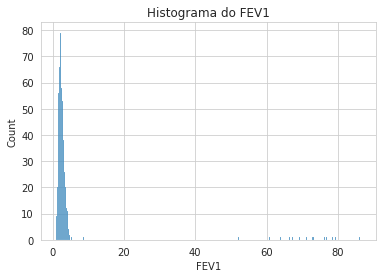

In [ ]:
#Plotar histograma do FEV1 para avaliar o comportamento
sns.set_style('whitegrid')
sns.histplot(x = 'FEV1', data = dados)
plt.title('Histograma do FEV1')
plt.show()

Identificado o desvio, vamos filtrar o dataset para que valores FEV1 sejam no máximo iguais a 80% do FVC

Segundo os apontamentos de estudos, a FEV1 costuma ser um valor 70 a 80% do total da FVC. Com isso em mente vamos limitar o valor ao máximo de 85%

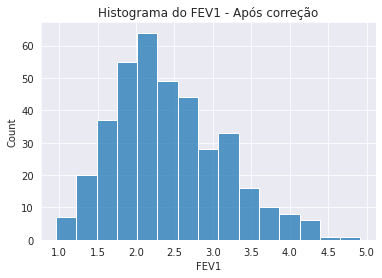

In [ ]:
dados = dados[dados['FEV1'] <= dados['FVC']*0.85]
sns.set_style('darkgrid')
sns.histplot(x = 'FEV1', data = dados)
plt.title('Histograma do FEV1 - Após correção')
plt.show()

Criar pairplot para visualização geral dos dados

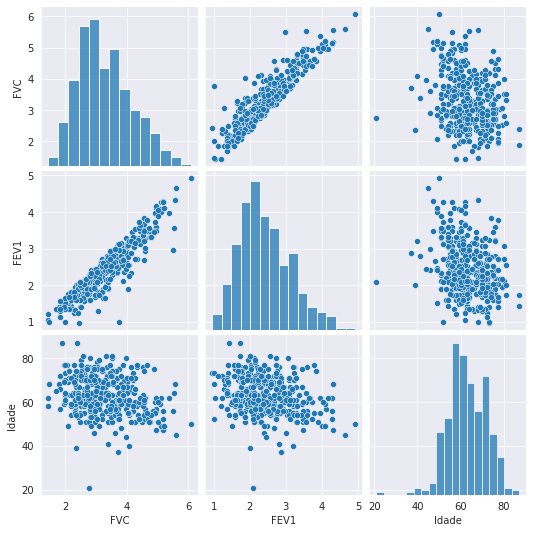

In [ ]:
#criar pairplot
sns.set_style('darkgrid')
sns.pairplot(dados[['FVC', 'FEV1', 'Idade']])
plt.show()

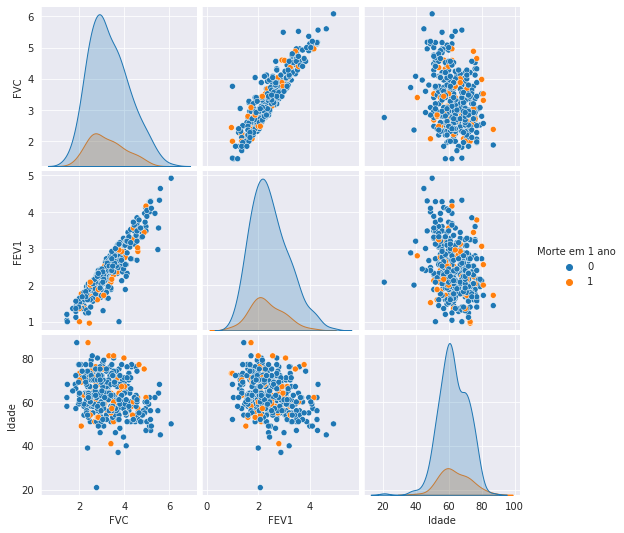

In [ ]:
#criar pairplot dos dados
sns.set_style('darkgrid')
sns.pairplot(dados[['FVC', 'FEV1', 'Idade', 'Morte em 1 ano']], hue = 'Morte em 1 ano')
plt.show()

A relação entre FEV1 e FVC (FEV1% ou também conhecido como índice de Tiffeneau-Pinelli )é extremamente importante para análise, entao vamos criar uma variável para medir

In [ ]:
dados['rel_FEV1_FVC'] = dados['FEV1']/dados['FVC']
dados.head()

,Diagnostico,FVC,FEV1,Perf. Status,Dor antes cirugia,Hemoptise antes cirurgia,Dispneia antes cirurgia,Tosse antes cirurgia,Fraqueza antes cirurgia,Tamanho Tumor,DM,IAM,Doenca Arterial Periferica,Tabagismo,Asma,Idade,Morte em 1 ano,rel_FEV1_FVC
0,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60.0,0,0.750000
1,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51.0,0,0.552941
2,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59.0,0,0.753623
3,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54.0,0,0.826087
4,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73.0,1,0.393443


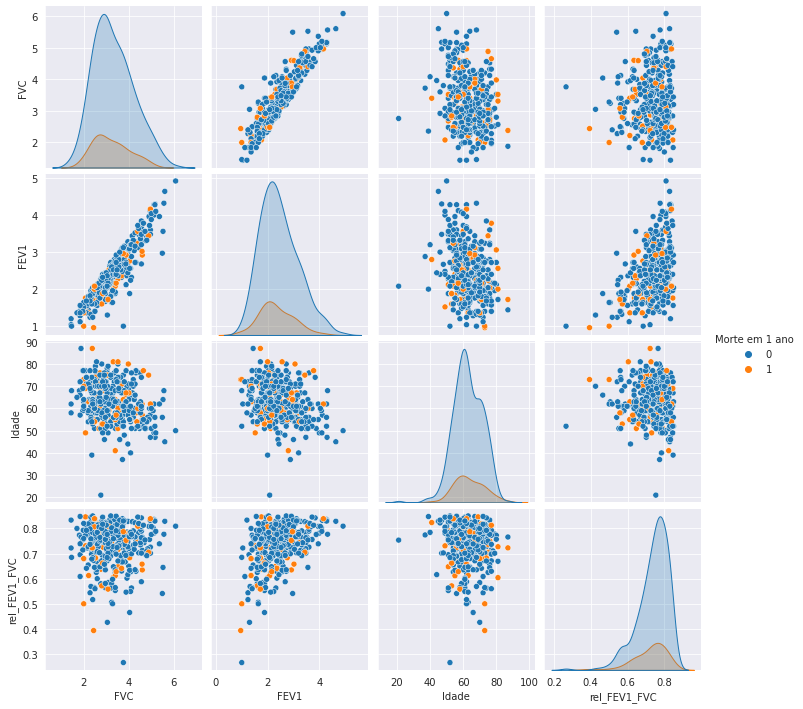

In [ ]:
#criar pairplot dos dados com a visão da nova variavel
sns.set_style('darkgrid')
sns.pairplot(dados[['FVC', 'FEV1', 'Idade', 'rel_FEV1_FVC', 'Morte em 1 ano']], hue = 'Morte em 1 ano')
plt.show()

Visualizando um mapa de calor com dados de correlação

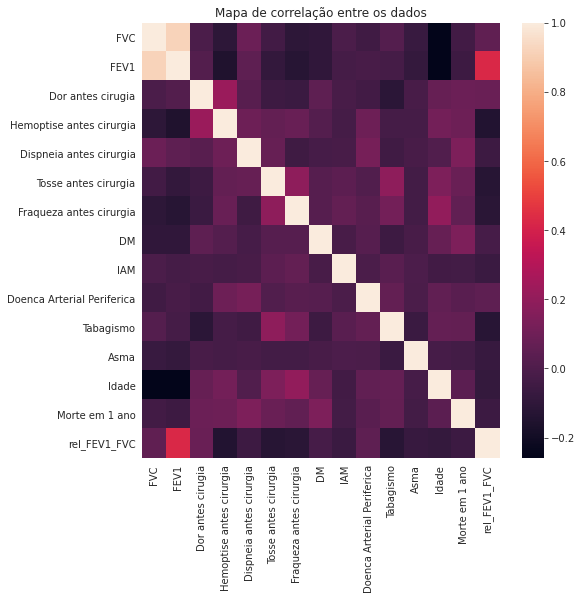

In [ ]:
dados_corr = dados.corr()

#Criar mapa de calor com a correlação
plt.figure(figsize = [8,8])
sns.heatmap(data = dados_corr)
plt.title('Mapa de correlação entre os dados')
plt.show()

Vamos observar como está o comportamento das variáveis categóricas

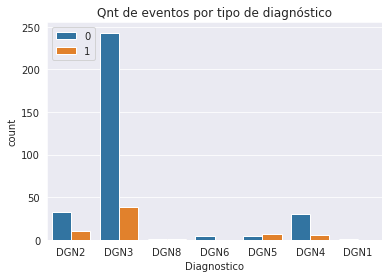

In [ ]:
#Diagnostico
sns.countplot(x = 'Diagnostico', data = dados, hue = 'Morte em 1 ano')
plt.title('Qnt de eventos por tipo de diagnóstico')
plt.legend()
plt.show()

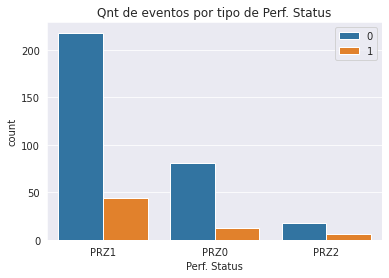

In [ ]:
#Performance status
sns.countplot(x = 'Perf. Status', data = dados, hue = 'Morte em 1 ano')
plt.title('Qnt de eventos por tipo de Perf. Status')
plt.legend()
plt.show()

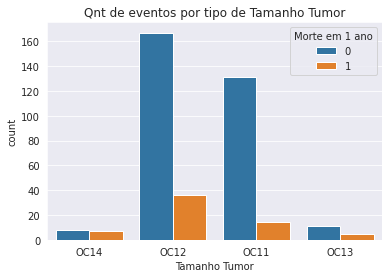

In [ ]:
#Tamanho do Tumor
sns.countplot(x = 'Tamanho Tumor', data = dados, hue = 'Morte em 1 ano')
plt.title('Qnt de eventos por tipo de Tamanho Tumor')
plt.show()

## Fazer pré-teste de *modelo*

Com todos esses dados, é possível ver que há um grande problema com o desbalanceamento das classes, mas mesmo assim vamos testar para ver como o modelo se comporta

In [ ]:
# Criar matriz de dados numéricos
def extrair_num_df_dados(df):
    def extrair_num(texto, num_carac):
        texto_str = str(texto)
        resultado = texto_str[-num_carac:]
        return int(resultado)

    col_iter = ['Diagnostico', 'Perf. Status', 'Tamanho Tumor']

    for col in col_iter:
        if col == 'Tamanho Tumor':
            df[col] = df[col].apply(lambda x: extrair_num(x,2))
        else:
            df[col] = df[col].apply(lambda x: extrair_num(x,1))
    return df

Testando duas formas diferentes de analisar:



1.   Primeira forma transformando os dados de diacnóóstico, status e tamanho para variável numérica (removendo o texto)
2.   A outra forma é utilizando-as como variável categórica. Porém para esse caso vamos remover variáveis que possuem um volume muito pequeno



In [ ]:
dados_num = extrair_num_df_dados(dados.copy())
dados_var = dados[~dados['Diagnostico'].isin(['DGN8', 'DGN1'])]

## Testar vários modelos de classificação

A variável 'dados_teste' funciona como um seletor para escolher entre a numérica e a categorica de forma mais fácil

In [ ]:
# Selecionar dados
dados_teste = dados_var.copy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score

modelos_classificacao = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC()
}

# Criar X e y
# Criar os X e y
target = 'Morte em 1 ano'


X = dados_teste.drop(target, axis = 1)
y = dados_teste[target]

for modelo in modelos_classificacao.keys():
    print('-----------')

    resultado_modelo = []

    for n_loop in range(1,7):

        # Dar split no modelo
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = n_loop)

        # Aplicar One Hot Encoding
        hotenc = make_column_transformer((OneHotEncoder(sparse = False, drop = 'first'),
                                          ['Diagnostico', 'Perf. Status', 'Tamanho Tumor']),
                                         remainder = 'passthrough')

        # Selecionar modelo
        mdl = modelos_classificacao[modelo]

        # Criar pipe
        pipe = make_pipeline(hotenc, mdl)
        
        # Treinar o modelo (.fit)
        pipe.fit(X_train, y_train)

        # Prever os dados
        y_pred = pipe.predict(X_test)

        # Printar resultado
        auc = roc_auc_score(y_test, y_pred)

        # Armazenar resultado
        resultado_modelo.append(auc)


    print('O ROC AUC médio do modelo {} é de {}'.format(modelo, np.mean(resultado_modelo).round(4)))

-----------
O ROC AUC médio do modelo Random Forest é de 0.4922
-----------
O ROC AUC médio do modelo Decision Tree é de 0.4919
-----------
O ROC AUC médio do modelo XGBoost é de 0.5032
-----------
O ROC AUC médio do modelo LGBM é de 0.4822
-----------
O ROC AUC médio do modelo KNN é de 0.4909
-----------
O ROC AUC médio do modelo SVC é de 0.5


Resultados:

Com var num, o melhor resultado foi da Decision Tree com 0.5665

Cam Var categorica, o melhor resultado foi da XGBoost com 0.5032


# **Vamos entender que os resultados até então obtidos são horríveis**

## Qual o grande problema? Classes Desbalanceadas!

O que é uma classe desbalanceada? É uma diferença enorme no tamanho das amostras pela quantidade de amostras verdadeiras e falsas no dataset

In [ ]:
total_verdadeiros = np.sum(y)
total_populacao = y.size
print(
    'Total verdadeiros de {} numa populacao de {}'.format(
    total_verdadeiros, total_populacao
    )
)

Total verdadeiros de 61 numa populacao de 376


# **Como prosseguir?**

Existem algumas técnicas para lidar com classes desbalanceadas, tais como:


*   -> Ajustar métrica correta para decisão
*   -> Utilizar técnicas de reamostragrem (Undersampling e Oversampling)
*   -> Testar resultados utilizando K-Fold Cross Validation
*   -> Criar modelos de ensemble utilizando várias amostras
*   -> Reamostragem de diferentes tamanhos
*   -> Clusterizar classes abundantes
*   -> Desenhar os próprios modelos


## Temos os detalhes em questão:
*  -> Já utilizamos uma boa métrica
*  -> Não realizamos
*  -> Testamos também crossvalidation junto com K-Fold (Stratifield k-fold)
*  -> Modelos de ensemble para várias amostras seria problemático pelo baixo volume de dados
*  -> Testamos reamostragem de diferentes tamanhos quando alteramos o 'sample_size'
*  -> Clusterizar classes abundantes (não se aplica ao nosso modelo)
*  -> Desenhar os próprios modelos (Active Learning) falta de instrumento técnico para fornecer mais dados no nosso caso

In [ ]:
# Vamos testar o Oversamplig (criar novas amostras sintéticas dos dados)
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(sampling_strategy = 'not majority')

# Nesse caso, como vamos adicionar amostras sintéticas, utilizaremos todo o dataset
X = dados_num.drop(target, axis = 1)
y = dados_num[target]

# Aplicar o SMOTE (resample)
X_res, y_res = oversampling.fit_resample(X,y)

for modelo in modelos_classificacao.keys():
    print('-----------')

    resultado_modelo = []

    for n_loop in range(1,7):

        # Dar split no modelo
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,test_size = 0.3, random_state = n_loop)

        # Selecionar modelo
        mdl = modelos_classificacao[modelo]
        
        # Treinar o modelo (.fit)
        mdl.fit(X_train, y_train)

        # Prever os dados
        y_pred = mdl.predict(X_test)

        # Printar resultado
        auc = roc_auc_score(y_test, y_pred)

        # Armazenar resultado
        resultado_modelo.append(auc)


    print('O ROC AUC médio do modelo {} é de {}'.format(modelo, np.mean(resultado_modelo).round(4)))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


-----------
O ROC AUC médio do modelo Random Forest é de 0.8703
-----------
O ROC AUC médio do modelo Decision Tree é de 0.8096
-----------
O ROC AUC médio do modelo XGBoost é de 0.8418
-----------
O ROC AUC médio do modelo LGBM é de 0.8666
-----------
O ROC AUC médio do modelo KNN é de 0.7487
-----------
O ROC AUC médio do modelo SVC é de 0.5008


## Resultados

*  Usando método 'minority' no SMOTE: Random Forest com AUC de 0.8888
*  Usando método 'not majority' no SMOTE: Random Forest com AUC de 0.8921
*  Usando método 'all' no SMOTE: Random Forest com AUC de 0.8893

## Apurando mais resultados (outras métricas)



In [ ]:
# Dar split no modelo
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,test_size = 0.3)

# Selecionar modelo
rfc = RandomForestClassifier()

# Treinar o modelo (.fit)
rfc.fit(X_train, y_train)

# Prever os dados
y_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

metrics = {
    'Acuracia': accuracy_score,
    'Precisao': precision_score,
    'F1': f1_score
}

for metric in metrics.keys():
    result = metrics[metric](y_test, y_pred)
    print('O valor da {} é de {}'.format(metric, result))

O valor da Acuracia é de 0.8638743455497382
O valor da Precisao é de 0.8536585365853658
O valor da F1 é de 0.8433734939759037


## Tunar Hiperparâmetros

Para realizar o model Tunning, vamos utilizar o skopt, pois ele utiliza o método de bayesian optmize.

## ***Qual a diferença:***

GridSearchCV -> Busca extensiva

RandomSearchCV -> Busca aleatória

Bayesian Optmization (forest_minimize) -> Busca 'aleatória'

In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 102kB 3.8MB/s 


In [ ]:
from skopt import forest_minimize

params = [(5,300), # n_estimators
          ('gini', 'entropy'), # criterion
          (3,50), # max_depth
          (2,20), # min_samples
          (1,10), # min_samples_leaf
          (.0, .5)] # min_impurity_decrease

def decision_tree_tune(params):
    # Separar o parâmetros para tune
    n_estimators = params[0]
    criterion = params[1]
    max_depth = params[2]
    min_samples = params[3]
    min_samples_leaf = params[4]
    min_impurity_decrease = params[5]

    # Criando o modelo importando os parâmetros
    random_forest = RandomForestClassifier(n_estimators = n_estimators,
                                           criterion = criterion,
                                           max_depth = max_depth,
                                           min_samples_split = min_samples,
                                           min_samples_leaf = min_samples_leaf,
                                           min_impurity_decrease = min_impurity_decrease)
    
    # Treinando e prevendo valores com o modelo
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)

    # Verificar o AUC do modelo
    result = roc_auc_score(y_test, y_pred)

    return -result

# Buscar os melhores parâmetros
resultado_tune = forest_minimize(decision_tree_tune,
                                 params,
                                 n_random_starts = 100,
                                 n_calls = 500)          

In [ ]:
melhor_tune = resultado_tune.x
melhor_resultado = resultado_tune.fun
print(melhor_tune, melhor_resultado)

[273, 'entropy', 20, 5, 1, 0.0017865069726850096] -0.903093012906097


In [ ]:

random_forest_final = RandomForestClassifier(n_estimators=273,
                                             criterion = 'entropy',
                                             max_depth=20,
                                             min_samples_split = 5,
                                             min_samples_leaf = 1,
                                             min_impurity_decrease=0.0017865069726850096)

random_forest_final.fit(X_train,y_train)

import joblib

joblib.dump(random_forest_final, 'random_forest.pkl.z')


['random_forest.pkl.z']

In [ ]:
algoritmo = joblib.load('random_forest.pkl.z')